In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import json

This is not the little circles being plotted... What?

In [2]:
poses_raw_data = """
Received data: {"poses": [[1311, 116], [591, 1478], [4, 472], [1143, 1469], [1167, 1015], [917, 40], [71, 1024], [169, 254], [36, 1093], [1431, 516], [951, 313], [694, 922], [139, 403], [1080, 1397], [278, 731], [68, 622], [363, 752], [1459, 1411], [1039, 441], [906, 562]]}
Received data: {"poses": [[1311, 115], [591, 1477], [4, 471], [1142, 1468], [1166, 1015], [917, 39], [70, 1023], [168, 253], [35, 1093], [1431, 516], [950, 312], [694, 921], [139, 403], [1079, 1397], [277, 730], [68, 622], [363, 752], [1459, 1411], [1039, 440], [906, 561]]}
Received data: {"poses": [[1357, 109], [591, 1431], [16, 427], [1107, 1439], [1143, 1055], [940, -1], [24, 1023], [150, 211], [-9, 1106], [1433, 562], [909, 291], [740, 919], [175, 431], [1071, 1442], [232, 722], [71, 668], [404, 773], [1492, 1443], [1084, 428], [938, 528]]}
Received data: {"poses": [[1361, 110], [593, 1427], [19, 423], [1104, 1435], [1140, 1058], [943, -4], [20, 1021], [149, 206], [-14, 1106], [1432, 567], [906, 288], [745, 920], [178, 435], [1069, 1447], [227, 720], [70, 672], [407, 776], [1494, 1448], [1088, 429], [942, 526]]}
Received data: {"poses": [[1361, 110], [593, 1427], [19, 423], [1104, 1435], [1140, 1058], [943, -4], [20, 1021], [149, 207], [-14, 1106], [1432, 566], [906, 288], [744, 920], [178, 435], [1070, 1446], [228, 721], [70, 672], [407, 776], [1494, 1447], [1088, 428], [942, 526]]}
Received data: {"poses": [[1361, 108], [591, 1427], [17, 423], [1103, 1436], [1141, 1059], [942, -5], [20, 1023], [148, 207], [-13, 1107], [1433, 566], [905, 289], [744, 919], [179, 434], [1071, 1447], [227, 722], [71, 672], [408, 775], [1495, 1446], [1088, 427], [941, 525]]}
Received data: {"poses": [[1361, 107], [590, 1426], [17, 422], [1102, 1436], [1142, 1060], [941, -6], [19, 1024], [147, 207], [-13, 1108], [1434, 567], [904, 290], [745, 918], [180, 433], [1071, 1447], [227, 722], [72, 673], [409, 774], [1496, 1446], [1088, 426], [941, 524]]}
Received data: {"poses": [[1361, 108], [591, 1427], [17, 422], [1103, 1436], [1142, 1059], [941, -5], [20, 1023], [147, 207], [-13, 1108], [1434, 566], [905, 290], [744, 918], [179, 433], [1071, 1447], [227, 722], [72, 672], [408, 774], [1495, 1446], [1087, 427], [940, 524]]}
Received data: {"poses": [[1304, 109], [583, 1482], [-5, 474], [1142, 1477], [1175, 1014], [908, 40], [75, 1031], [164, 261], [42, 1098], [1437, 510], [952, 321], [688, 915], [139, 394], [1087, 1393], [281, 738], [74, 616], [361, 743], [1460, 1402], [1032, 435], [897, 560]]}
Received data: {"poses": [[1250, 109], [574, 1536], [-27, 524], [1178, 1518], [1209, 971], [874, 83], [129, 1040], [179, 313], [96, 1090], [1442, 456], [996, 352], [634, 910], [102, 355], [1104, 1341], [333, 755], [78, 562], [317, 712], [1428, 1358], [978, 441], [854, 593]]}
Received data: {"poses": [[1187, 109], [565, 1599], [-52, 582], [1221, 1564], [1247, 921], [836, 133], [192, 1049], [197, 374], [158, 1079], [1447, 393], [1048, 388], [571, 905], [57, 309], [1124, 1281], [393, 775], [82, 499], [265, 676], [1389, 1308], [915, 449], [804, 633]]}
Received data: {"poses": [[1122, 111], [556, 1663], [-77, 642], [1265, 1611], [1286, 869], [797, 185], [256, 1058], [216, 436], [222, 1068], [1452, 328], [1102, 424], [506, 900], [11, 264], [1142, 1219], [455, 793], [85, 434], [211, 640], [1349, 1257], [851, 459], [754, 674]]}
Received data: {"poses": [[1116, 109], [554, 1669], [-81, 647], [1268, 1617], [1291, 865], [792, 189], [262, 1060], [216, 442], [229, 1068], [1454, 322], [1106, 429], [500, 898], [8, 258], [1146, 1213], [461, 797], [87, 428], [207, 635], [1346, 1251], [845, 458], [748, 676]]}
Received data: {"poses": [[1116, 110], [554, 1668], [-81, 646], [1268, 1617], [1291, 865], [792, 189], [261, 1060], [216, 442], [228, 1068], [1453, 323], [1106, 429], [501, 899], [8, 259], [1145, 1214], [460, 796], [87, 428], [207, 635], [1346, 1252], [845, 458], [749, 676]]}
Received data: {"poses": [[1116, 110], [555, 1668], [-80, 647], [1268, 1616], [1290, 865], [793, 189], [261, 1059], [217, 442], [228, 1067], [1453, 323], [1106, 428], [501, 899], [7, 259], [1145, 1214], [460, 796], [86, 428], [207, 636], [1346, 1252], [845, 459], [749, 677]]}
Received data: {"poses": [[1116, 111], [555, 1669], [-80, 647], [1269, 1616], [1290, 864], [793, 190], [262, 1059], [218, 442], [228, 1067], [1452, 322], [1107, 428], [500, 900], [7, 259], [1144, 1213], [461, 795], [86, 428], [206, 636], [1345, 1252], [845, 460], [749, 678]]}
Received data: {"poses": [[1116, 111], [555, 1669], [-80, 647], [1269, 1616], [1290, 864], [793, 190], [262, 1059], [218, 442], [228, 1067], [1452, 322], [1107, 428], [500, 900], [7, 259], [1144, 1213], [461, 795], [86, 428], [206, 636], [1345, 1252], [845, 460], [749, 678]]}
Received data: {"poses": [[1114, 110], [554, 1671], [-82, 649], [1270, 1618], [1292, 863], [791, 191], [264, 1060], [217, 444], [231, 1067], [1453, 320], [1108, 430], [498, 899], [6, 257], [1146, 1211], [463, 797], [87, 426], [205, 634], [1345, 1250], [843, 459], [747, 678]]}
Received data: {"poses": [[1114, 109], [553, 1671], [-82, 649], [1270, 1619], [1293, 863], [790, 191], [264, 1061], [217, 445], [231, 1068], [1454, 320], [1108, 431], [498, 898], [6, 256], [1146, 1211], [463, 797], [88, 425], [205, 633], [1345, 1249], [842, 458], [746, 678]]}
Received data: {"poses": [[1117, 166], [610, 1676], [-29, 669], [1310, 1578], [1246, 831], [837, 223], [269, 1004], [270, 426], [219, 1012], [1397, 318], [1138, 382], [496, 955], [-32, 298], [1091, 1197], [477, 742], [31, 425], [175, 682], [1302, 1286], [853, 514], [784, 720]]}
Received data: {"poses": [[1119, 222], [666, 1683], [23, 690], [1350, 1539], [1200, 798], [883, 256], [276, 948], [324, 408], [208, 957], [1341, 315], [1169, 335], [493, 1011], [-71, 339], [1037, 1181], [493, 688], [-26, 423], [144, 729], [1258, 1322], [861, 570], [820, 764]]}
Received data: {"poses": [[1122, 290], [733, 1691], [86, 714], [1398, 1492], [1145, 759], [938, 295], [284, 881], [388, 386], [194, 891], [1273, 313], [1205, 278], [491, 1079], [-117, 388], [972, 1164], [510, 623], [-93, 422], [108, 786], [1206, 1365], [873, 636], [864, 815]]}
Received data: {"poses": [[1126, 346], [789, 1696], [139, 734], [1437, 1452], [1099, 727], [984, 327], [289, 825], [441, 367], [182, 836], [1217, 312], [1234, 230], [490, 1135], [-155, 430], [917, 1150], [524, 568], [-149, 421], [79, 834], [1164, 1402], [883, 692], [902, 857]]}
Received data: {"poses": [[1131, 413], [856, 1701], [202, 756], [1483, 1403], [1042, 690], [1041, 364], [294, 758], [504, 344], [166, 771], [1150, 311], [1268, 172], [489, 1202], [-200, 480], [852, 1134], [540, 503], [-217, 422], [45, 892], [1113, 1446], [897, 757], [947, 906]]}
Received data: {"poses": [[1137, 469], [912, 1704], [256, 774], [1521, 1361], [995, 660], [1088, 394], [297, 702], [556, 323], [152, 716], [1093, 312], [1296, 123], [490, 1259], [-236, 523], [797, 1122], [552, 448], [-273, 424], [17, 941], [1072, 1485], [909, 813], [986, 947]]}
Received data: {"poses": [[1144, 536], [980, 1707], [320, 794], [1566, 1311], [938, 625], [1145, 429], [300, 634], [618, 297], [134, 651], [1026, 313], [1328, 63], [491, 1326], [-279, 575], [731, 1109], [565, 382], [-340, 426], [-15, 1001], [1023, 1531], [925, 878], [1033, 995]]}
Received data: {"poses": [[1151, 592], [1036, 1709], [374, 811], [1603, 1268], [889, 596], [1194, 458], [302, 578], [670, 275], [118, 597], [970, 315], [1354, 14], [493, 1382], [-315, 619], [676, 1098], [576, 327], [-397, 430], [-41, 1050], [982, 1570], [939, 933], [1073, 1035]]}
Received data: {"poses": [[1161, 657], [1102, 1710], [437, 829], [1645, 1218], [832, 563], [1251, 491], [303, 512], [730, 248], [99, 534], [904, 319], [1384, -45], [497, 1448], [-355, 671], [611, 1087], [587, 262], [-462, 434], [-71, 1109], [936, 1616], [956, 996], [1121, 1080]]}
Received data: {"poses": [[1169, 712], [1158, 1710], [491, 843], [1681, 1174], [783, 536], [1300, 518], [303, 456], [781, 225], [82, 481], [848, 323], [1409, -95], [501, 1504], [-389, 715], [555, 1078], [596, 206], [-518, 439], [-96, 1159], [897, 1657], [971, 1050], [1162, 1119]]}
Received data: {"poses": [[1168, 719], [1164, 1712], [497, 847], [1686, 1170], [778, 531], [1305, 523], [305, 450], [788, 224], [82, 474], [842, 321], [1413, -100], [499, 1510], [-394, 719], [549, 1075], [599, 200], [-525, 438], [-100, 1164], [891, 1660], [971, 1057], [1165, 1125]]}
Received data: {"poses": [[1169, 719], [1164, 1712], [497, 846], [1686, 1170], [779, 531], [1304, 523], [305, 450], [787, 224], [81, 475], [842, 322], [1413, -100], [500, 1510], [-394, 719], [550, 1075], [599, 201], [-524, 438], [-100, 1164], [891, 1660], [971, 1056], [1165, 1124]]}
Received data: {"poses": [[1170, 719], [1164, 1711], [497, 845], [1685, 1169], [778, 533], [1305, 521], [304, 450], [787, 222], [80, 475], [842, 323], [1411, -101], [501, 1510], [-393, 720], [549, 1077], [597, 200], [-524, 439], [-98, 1165], [892, 1661], [973, 1056], [1166, 1123]]}
Received data: {"poses": [[1170, 719], [1164, 1710], [497, 845], [1685, 1169], [778, 533], [1305, 521], [303, 450], [787, 222], [80, 475], [842, 323], [1411, -101], [501, 1510], [-393, 721], [549, 1077], [597, 200], [-524, 440], [-98, 1165], [892, 1661], [973, 1056], [1166, 1123]]}
Received data: {"poses": [[1136, 673], [1114, 1737], [442, 858], [1674, 1225], [835, 534], [1248, 520], [330, 500], [753, 268], [121, 515], [890, 293], [1413, -44], [471, 1462], [-384, 664], [603, 1058], [616, 254], [-476, 409], [-100, 1108], [908, 1607], [933, 1015], [1111, 1108]]}
Received data: {"poses": [[1103, 627], [1063, 1762], [386, 869], [1661, 1280], [891, 537], [1192, 517], [355, 551], [717, 312], [160, 555], [939, 265], [1413, 12], [443, 1413], [-373, 609], [657, 1042], [632, 308], [-428, 379], [-100, 1052], [926, 1553], [895, 973], [1057, 1092]]}
Received data: {"poses": [[1064, 572], [1003, 1793], [320, 883], [1647, 1346], [959, 539], [1124, 515], [386, 611], [676, 365], [208, 603], [997, 230], [1415, 80], [408, 1355], [-362, 542], [721, 1021], [653, 372], [-371, 343], [-102, 984], [945, 1488], [849, 924], [992, 1073]]}
Received data: {"poses": [[1030, 527], [953, 1819], [265, 895], [1636, 1402], [1015, 540], [1068, 514], [412, 661], [641, 410], [249, 642], [1045, 200], [1417, 137], [378, 1307], [-353, 486], [775, 1002], [672, 426], [-323, 313], [-104, 927], [961, 1434], [810, 883], [938, 1059]]}
Received data: {"poses": [[988, 474], [894, 1852], [200, 911], [1624, 1468], [1083, 540], [1000, 514], [445, 720], [601, 464], [298, 688], [1102, 163], [1420, 204], [341, 1250], [-343, 419], [839, 979], [695, 490], [-267, 275], [-107, 860], [979, 1369], [762, 835], [872, 1042]]}
Received data: {"poses": [[949, 424], [838, 1883], [138, 927], [1614, 1531], [1146, 540], [937, 514], [476, 776], [564, 516], [345, 732], [1155, 128], [1424, 268], [306, 1197], [-335, 356], [898, 957], [717, 549], [-215, 239], [-111, 796], [995, 1307], [717, 790], [810, 1027]]}
Received data: {"poses": [[946, 417], [832, 1885], [131, 927], [1611, 1537], [1153, 541], [930, 513], [478, 782], [559, 521], [348, 737], [1162, 126], [1422, 274], [304, 1190], [-332, 350], [905, 957], [717, 556], [-208, 237], [-109, 790], [998, 1301], [713, 784], [804, 1024]]}
Received data: {"poses": [[945, 419], [834, 1886], [133, 929], [1613, 1536], [1152, 540], [931, 514], [479, 780], [561, 521], [349, 735], [1160, 125], [1424, 273], [303, 1192], [-334, 351], [903, 955], [719, 554], [-210, 236], [-111, 791], [996, 1302], [713, 787], [805, 1026]]}
Received data: {"poses": [[975, 379], [799, 1850], [108, 885], [1563, 1541], [1165, 588], [918, 466], [443, 815], [515, 503], [326, 779], [1197, 158], [1377, 289], [336, 1155], [-284, 344], [932, 996], [678, 583], [-172, 268], [-64, 775], [1046, 1301], [738, 743], [804, 976]]}
Received data: {"poses": [[1016, 328], [755, 1802], [78, 827], [1498, 1545], [1180, 651], [903, 403], [395, 859], [454, 478], [293, 836], [1244, 203], [1314, 307], [381, 1108], [-219, 338], [968, 1051], [623, 619], [-124, 313], [-1, 757], [1111, 1303], [772, 688], [804, 911]]}
Received data: {"poses": [[1051, 284], [716, 1760], [51, 777], [1441, 1549], [1194, 706], [889, 348], [353, 898], [402, 457], [266, 886], [1286, 242], [1260, 324], [420, 1066], [-163, 332], [1000, 1097], [577, 651], [-82, 351], [53, 740], [1168, 1304], [801, 639], [804, 854]]}
Received data: {"poses": [[1090, 231], [670, 1713], [20, 720], [1376, 1555], [1211, 770], [872, 284], [306, 944], [341, 433], [235, 944], [1334, 286], [1197, 344], [464, 1018], [-98, 324], [1038, 1151], [523, 689], [-33, 394], [116, 720], [1233, 1304], [834, 582], [803, 788]]}
Received data: {"poses": [[1124, 186], [630, 1673], [-9, 671], [1320, 1561], [1226, 824], [857, 230], [266, 984], [287, 414], [209, 994], [1377, 323], [1144, 362], [501, 975], [-42, 317], [1071, 1197], [477, 722], [11, 430], [169, 702], [1290, 1303], [861, 533], [801, 732]]}
Received data: {"poses": [[1162, 132], [584, 1627], [-42, 614], [1254, 1568], [1245, 887], [838, 167], [220, 1030], [225, 392], [180, 1053], [1427, 366], [1082, 384], [544, 925], [23, 307], [1110, 1250], [424, 761], [61, 472], [231, 680], [1356, 1302], [893, 475], [798, 666]]}
Received data: {"poses": [[1194, 85], [543, 1588], [-71, 566], [1198, 1575], [1262, 941], [821, 113], [181, 1071], [172, 374], [156, 1104], [1471, 402], [1029, 404], [580, 881], [79, 298], [1144, 1295], [379, 795], [106, 507], [284, 660], [1412, 1299], [919, 425], [795, 610]]}
Received data: {"poses": [[1232, 28], [492, 1541], [-108, 507], [1130, 1585], [1284, 1007], [799, 47], [134, 1122], [106, 353], [127, 1167], [1524, 445], [965, 429], [623, 828], [147, 285], [1187, 1349], [325, 838], [160, 549], [348, 635], [1481, 1295], [950, 363], [790, 541]]}
Received data: {"poses": [[1237, 24], [488, 1536], [-110, 501], [1123, 1584], [1284, 1013], [799, 41], [129, 1126], [101, 349], [122, 1172], [1528, 451], [958, 430], [629, 824], [154, 286], [1189, 1355], [319, 840], [164, 555], [355, 634], [1488, 1297], [955, 358], [791, 534]]}
Received data: {"poses": [[1237, 24], [488, 1536], [-110, 502], [1124, 1585], [1284, 1013], [799, 41], [129, 1126], [101, 350], [123, 1172], [1528, 450], [958, 430], [628, 824], [153, 286], [1189, 1355], [319, 840], [164, 554], [355, 634], [1487, 1296], [954, 358], [791, 535]]}
Received data: {"poses": [[1282, 38], [510, 1493], [-78, 466], [1104, 1541], [1245, 1040], [838, 14], [86, 1104], [102, 302], [75, 1164], [1510, 494], [929, 392], [672, 842], [174, 329], [1161, 1394], [281, 813], [146, 599], [384, 672], [1503, 1342], [1001, 367], [836, 518]]}
Received data: {"poses": [[1344, 60], [541, 1436], [-33, 418], [1079, 1480], [1189, 1075], [894, -21], [29, 1073], [106, 236], [11, 1152], [1482, 554], [891, 338], [732, 870], [201, 388], [1121, 1446], [228, 772], [120, 659], [422, 726], [1523, 1404], [1065, 382], [898, 497]]}
Received data: {"poses": [[1398, 79], [568, 1385], [5, 377], [1057, 1428], [1142, 1106], [941, -52], [-22, 1046], [109, 180], [-45, 1143], [1460, 606], [858, 293], [784, 892], [226, 440], [1088, 1491], [183, 739], [98, 711], [455, 771], [1540, 1458], [1121, 393], [952, 479]]}
Received data: {"poses": [[1461, 99], [598, 1327], [49, 328], [1030, 1368], [1087, 1143], [996, -89], [-80, 1016], [111, 114], [-110, 1132], [1434, 666], [818, 240], [844, 918], [255, 499], [1049, 1544], [130, 700], [74, 772], [495, 824], [1562, 1520], [1185, 406], [1014, 456]]}
Received data: {"poses": [[1515, 115], [622, 1276], [86, 285], [1006, 1317], [1041, 1176], [1042, -122], [-131, 992], [112, 57], [-166, 1125], [1413, 719], [783, 195], [897, 939], [281, 549], [1016, 1591], [83, 667], [53, 825], [530, 869], [1582, 1574], [1241, 415], [1066, 436]]}
Received data: {"poses": [[1580, 134], [651, 1214], [130, 233], [976, 1256], [986, 1215], [1097, -161], [-193, 963], [112, -11], [-233, 1116], [1389, 782], [741, 143], [960, 963], [312, 609], [979, 1647], [27, 630], [30, 889], [572, 921], [1606, 1637], [1308, 426], [1129, 410]]}
Received data: {"poses": [[1586, 138], [656, 1209], [136, 229], [975, 1249], [980, 1218], [1103, -164], [-198, 958], [114, -17], [-240, 1114], [1384, 788], [738, 136], [966, 968], [314, 616], [973, 1651], [23, 624], [26, 894], [575, 928], [1606, 1644], [1314, 429], [1136, 410]]}
Received data: {"poses": [[1616, 175], [697, 1185], [182, 216], [982, 1202], [931, 1219], [1152, -165], [-222, 917], [141, -57], [-276, 1082], [1345, 815], [734, 89], [993, 1007], [308, 664], [929, 1669], [5, 580], [-13, 922], [579, 975], [1595, 1690], [1349, 462], [1183, 420]]}
Received data: {"poses": [[1656, 227], [755, 1153], [246, 201], [994, 1137], [866, 1218], [1217, -164], [-254, 859], [180, -110], [-324, 1036], [1289, 850], [731, 23], [1028, 1063], [299, 729], [867, 1691], [-17, 518], [-68, 959], [582, 1041], [1578, 1754], [1395, 509], [1247, 436]]}
Received data: {"poses": [[1692, 271], [804, 1125], [301, 187], [1003, 1081], [809, 1219], [1274, -165], [-282, 810], [213, -156], [-365, 998], [1242, 882], [728, -34], [1060, 1110], [291, 785], [813, 1711], [-37, 464], [-115, 991], [585, 1098], [1563, 1809], [1436, 549], [1302, 450]]}
Received data: {"poses": [[1735, 324], [863, 1091], [366, 168], [1013, 1014], [741, 1221], [1342, -167], [-316, 751], [252, -212], [-416, 953], [1186, 920], [722, -101], [1098, 1166], [284, 852], [750, 1736], [-62, 401], [-170, 1030], [591, 1165], [1548, 1875], [1485, 595], [1368, 464]]}
Received data: {"poses": [[1773, 368], [913, 1060], [423, 152], [1021, 956], [682, 1223], [1401, -169], [-347, 701], [284, -261], [-461, 915], [1138, 954], [717, -160], [1132, 1214], [278, 911], [696, 1758], [-84, 347], [-217, 1065], [596, 1224], [1535, 1932], [1528, 635], [1426, 476]]}
Received data: {"poses": [[1817, 418], [968, 1025], [485, 132], [1028, 890], [617, 1227], [1466, -173], [-382, 646], [319, -316], [-512, 873], [1086, 993], [709, -225], [1171, 1266], [273, 976], [636, 1784], [-110, 287], [-269, 1105], [604, 1289], [1522, 1996], [1578, 679], [1490, 488]]}
Received data: {"poses": [[1819, 424], [975, 1023], [492, 132], [1031, 884], [610, 1226], [1473, -172], [-384, 639], [324, -321], [-515, 868], [1079, 996], [710, -232], [1174, 1273], [270, 983], [629, 1785], [-111, 280], [-275, 1108], [603, 1296], [1519, 2002], [1581, 684], [1496, 491]]}
Received data: {"poses": [[1826, 482], [1033, 1025], [548, 149], [1070, 840], [560, 1195], [1523, -141], [-382, 581], [379, -343], [-531, 811], [1020, 997], [738, -284], [1175, 1332], [233, 1028], [571, 1774], [-100, 222], [-334, 1110], [575, 1348], [1476, 2043], [1595, 742], [1538, 533]]}
Received data: {"poses": [[1831, 541], [1092, 1030], [604, 169], [1110, 797], [511, 1163], [1572, -109], [-377, 522], [434, -364], [-545, 754], [962, 997], [768, -334], [1175, 1390], [195, 1073], [514, 1761], [-87, 165], [-393, 1111], [545, 1398], [1432, 2082], [1607, 799], [1578, 576]]}
Received data: {"poses": [[1839, 612], [1163, 1033], [672, 190], [1158, 744], [450, 1126], [1633, -72], [-374, 451], [500, -391], [-564, 685], [890, 999], [802, -397], [1177, 1462], [149, 1127], [444, 1746], [-72, 95], [-464, 1114], [511, 1461], [1380, 2131], [1624, 869], [1627, 627]]}
Received data: {"poses": [[1846, 670], [1222, 1035], [728, 207], [1196, 699], [400, 1096], [1683, -42], [-372, 392], [554, -415], [-581, 629], [831, 1001], [829, -449], [1179, 1521], [112, 1173], [387, 1735], [-61, 38], [-523, 1117], [484, 1513], [1338, 2172], [1638, 925], [1669, 668]]}
Received data: {"poses": [[1857, 739], [1292, 1036], [795, 226], [1240, 646], [339, 1061], [1744, -7], [-371, 322], [617, -443], [-601, 562], [762, 1005], [861, -511], [1183, 1590], [69, 1228], [318, 1723], [-49, -31], [-593, 1123], [452, 1575], [1289, 2222], [1656, 993], [1720, 717]]}
Received data: {"poses": [[1866, 797], [1350, 1035], [852, 241], [1277, 600], [288, 1033], [1795, 21], [-372, 264], [670, -468], [-620, 507], [704, 1009], [886, -564], [1187, 1648], [34, 1275], [260, 1714], [-40, -89], [-651, 1128], [427, 1628], [1249, 2264], [1673, 1049], [1763, 756]]}
Received data: {"poses": [[1865, 803], [1357, 1037], [857, 245], [1283, 596], [283, 1028], [1800, 26], [-370, 257], [677, -469], [-620, 500], [697, 1008], [891, -569], [1186, 1655], [29, 1279], [254, 1711], [-37, -95], [-657, 1127], [422, 1633], [1243, 2267], [1673, 1056], [1766, 762]]}
Received data: {"poses": [[1866, 802], [1356, 1036], [857, 244], [1281, 596], [283, 1029], [1800, 25], [-371, 258], [676, -470], [-620, 501], [698, 1009], [890, -569], [1187, 1654], [30, 1279], [255, 1712], [-38, -94], [-657, 1128], [423, 1633], [1244, 2267], [1673, 1055], [1766, 761]]}
Received data: {"poses": [[1814, 827], [1372, 1092], [858, 301], [1334, 619], [296, 973], [1787, 81], [-315, 242], [714, -426], [-573, 469], [678, 955], [946, -559], [1133, 1674], [-24, 1258], [248, 1655], [19, -101], [-677, 1074], [367, 1623], [1193, 2240], [1625, 1085], [1740, 812]]}
Received data: {"poses": [[1750, 855], [1389, 1159], [857, 371], [1398, 647], [314, 906], [1769, 148], [-248, 225], [758, -372], [-514, 431], [656, 889], [1015, -545], [1067, 1696], [-88, 1232], [241, 1586], [88, -108], [-700, 1008], [298, 1609], [1133, 2206], [1565, 1121], [1707, 874]]}
Received data: {"poses": [[1696, 879], [1405, 1216], [858, 430], [1452, 671], [327, 848], [1756, 206], [-191, 209], [796, -328], [-465, 398], [636, 833], [1073, -534], [1011, 1716], [-143, 1211], [234, 1527], [147, -115], [-721, 953], [240, 1598], [1081, 2178], [1515, 1152], [1680, 926]]}
Received data: {"poses": [[1635, 909], [1425, 1281], [860, 498], [1515, 696], [341, 782], [1742, 272], [-126, 189], [842, -277], [-409, 360], [612, 770], [1140, -524], [948, 1740], [-207, 1187], [225, 1460], [214, -124], [-747, 890], [173, 1588], [1020, 2147], [1457, 1189], [1650, 987]]}
Received data: {"poses": [[1583, 936], [1443, 1337], [864, 557], [1570, 717], [353, 724], [1730, 330], [-70, 171], [882, -234], [-362, 325], [590, 715], [1198, -516], [893, 1762], [-263, 1168], [215, 1402], [272, -134], [-770, 836], [115, 1580], [967, 2122], [1409, 1222], [1625, 1040]]}
Received data: {"poses": [[1523, 968], [1466, 1401], [869, 624], [1634, 740], [364, 657], [1719, 397], [-6, 148], [930, -186], [-308, 284], [563, 653], [1266, -508], [831, 1789], [-327, 1147], [203, 1335], [339, -146], [-798, 774], [47, 1572], [905, 2093], [1353, 1261], [1598, 1103]]}
Received data: {"poses": [[1471, 997], [1487, 1456], [874, 683], [1690, 759], [373, 598], [1710, 456], [49, 127], [972, -144], [-261, 247], [538, 599], [1324, -502], [777, 1814], [-384, 1131], [191, 1277], [397, -158], [-823, 721], [-11, 1566], [851, 2070], [1306, 1296], [1575, 1157]]}
Received data: {"poses": [[1413, 1032], [1512, 1520], [883, 751], [1755, 779], [381, 531], [1702, 523], [113, 102], [1021, -98], [-209, 203], [508, 538], [1392, -497], [716, 1844], [-450, 1113], [176, 1211], [463, -173], [-854, 660], [-79, 1561], [788, 2044], [1252, 1338], [1551, 1221]]}
Received data: {"poses": [[1363, 1064], [1535, 1574], [891, 809], [1812, 795], [387, 472], [1696, 582], [167, 79], [1066, -58], [-165, 164], [481, 485], [1451, -494], [663, 1871], [-507, 1099], [161, 1153], [521, -188], [-882, 608], [-138, 1558], [733, 2023], [1206, 1375], [1531, 1276]]}
Received data: {"poses": [[1306, 1102], [1564, 1636], [903, 877], [1878, 812], [392, 404], [1691, 650], [229, 50], [1118, -14], [-114, 118], [449, 425], [1520, -493], [603, 1903], [-574, 1084], [143, 1088], [586, -206], [-916, 548], [-207, 1557], [668, 2000], [1154, 1420], [1509, 1341]]}
Received data: {"poses": [[1258, 1136], [1590, 1689], [914, 935], [1936, 825], [395, 345], [1688, 709], [282, 24], [1164, 23], [-72, 77], [419, 374], [1579, -493], [552, 1933], [-632, 1073], [126, 1031], [643, -223], [-946, 498], [-266, 1557], [612, 1982], [1110, 1459], [1492, 1398]]}
Received data: {"poses": [[1203, 1176], [1621, 1750], [929, 1001], [2003, 839], [397, 277], [1686, 777], [343, -7], [1218, 65], [-24, 28], [383, 316], [1647, -495], [494, 1969], [-699, 1062], [104, 966], [708, -245], [-983, 440], [-334, 1559], [547, 1963], [1061, 1506], [1474, 1464]]}
Received data: {"poses": [[1155, 1214], [1651, 1803], [943, 1061], [2063, 849], [397, 216], [1686, 838], [396, -37], [1267, 101], [18, -17], [350, 265], [1708, -498], [443, 2002], [-760, 1053], [83, 909], [765, -266], [-1017, 389], [-395, 1562], [488, 1947], [1018, 1550], [1459, 1523]]}
Received data: {"poses": [[1100, 1258], [1686, 1864], [961, 1128], [2132, 860], [396, 146], [1687, 908], [457, -72], [1324, 141], [65, -69], [311, 206], [1778, -503], [384, 2041], [-829, 1045], [58, 844], [830, -291], [-1057, 332], [-465, 1567], [420, 1930], [969, 1600], [1443, 1591]]}
Received data: {"poses": [[1055, 1296], [1716, 1915], [978, 1185], [2190, 869], [394, 87], [1689, 967], [508, -102], [1373, 174], [103, -113], [277, 158], [1837, -507], [336, 2075], [-888, 1038], [36, 789], [885, -313], [-1092, 284], [-524, 1571], [362, 1916], [929, 1643], [1431, 1649]]}
Received data: {"poses": [[1004, 1341], [1752, 1972], [998, 1250], [2258, 877], [390, 18], [1693, 1036], [565, -138], [1431, 211], [147, -165], [237, 103], [1905, -515], [281, 2115], [-956, 1033], [9, 726], [948, -340], [-1133, 230], [-592, 1579], [295, 1903], [883, 1694], [1418, 1716]]}
Received data: {"poses": [[960, 1381], [1785, 2021], [1017, 1306], [2317, 882], [385, -40], [1698, 1094], [614, -171], [1481, 241], [183, -212], [201, 56], [1963, -523], [234, 2151], [-1015, 1029], [-16, 672], [1002, -365], [-1170, 184], [-650, 1587], [237, 1892], [845, 1739], [1409, 1774]]}
Received data: {"poses": [[910, 1430], [1826, 2079], [1041, 1372], [2387, 887], [377, -110], [1706, 1164], [672, -212], [1542, 276], [225, -268], [156, 2], [2032, -534], [180, 2196], [-1085, 1027], [-47, 610], [1064, -396], [-1216, 130], [-719, 1598], [168, 1882], [801, 1794], [1399, 1844]]}
Received data: {"poses": [[869, 1472], [1861, 2126], [1063, 1427], [2446, 889], [369, -169], [1714, 1223], [719, -247], [1594, 304], [260, -316], [118, -43], [2090, -545], [135, 2234], [-1144, 1027], [-74, 557], [1117, -423], [-1255, 86], [-777, 1609], [109, 1874], [765, 1841], [1393, 1902]]}
Received data: {"poses": [[821, 1523], [1904, 2181], [1091, 1491], [2516, 890], [358, -238], [1725, 1292], [774, -290], [1657, 336], [299, -375], [71, -95], [2159, -560], [83, 2281], [-1214, 1028], [-108, 496], [1178, -457], [-1303, 35], [-846, 1624], [40, 1867], [724, 1898], [1387, 1972]]}
Received data: {"poses": [[782, 1568], [1942, 2227], [1115, 1545], [2575, 890], [348, -296], [1735, 1350], [820, -328], [1710, 361], [330, -425], [30, -138], [2216, -574], [40, 2322], [-1273, 1031], [-138, 445], [1229, -487], [-1344, -7], [-903, 1638], [-19, 1862], [691, 1946], [1383, 2031]]}
Received data: {"poses": [[737, 1621], [1988, 2280], [1146, 1608], [2646, 887], [333, -365], [1750, 1419], [873, -374], [1774, 390], [367, -485], [-20, -187], [2284, -592], [-9, 2372], [-1343, 1036], [-175, 385], [1289, -524], [-1395, -56], [-971, 1656], [-90, 1858], [652, 2005], [1380, 2101]]}
Received data: {"poses": [[698, 1669], [2029, 2325], [1174, 1663], [2707, 884], [319, -424], [1764, 1478], [918, -415], [1830, 414], [397, -538], [-64, -230], [2343, -609], [-52, 2416], [-1404, 1041], [-209, 334], [1340, -558], [-1439, -97], [-1030, 1673], [-151, 1857], [620, 2057], [1380, 2162]]}
Received data: {"poses": [[656, 1725], [2078, 2376], [1207, 1724], [2776, 878], [301, -492], [1782, 1546], [969, -464], [1896, 439], [430, -599], [-116, -277], [2410, -630], [-99, 2468], [-1474, 1049], [-249, 277], [1397, -598], [-1492, -144], [-1097, 1694], [-221, 1856], [585, 2118], [1380, 2233]]}
"""

The first term looks like the term above. Let's decode parts of it, and plot their path - we don't have the heading info here.

In [5]:
poses_lines = poses_raw_data.split("\n")
poses_lines = [line.replace("Received data: ", "") for line in poses_lines if line]
len(poses_lines)

97

In [6]:
poses_dicts = [json.loads(line) for line in poses_lines]
poses_over_time = np.array([poses_dict["poses"] for poses_dict in poses_dicts])
# ThreeD array = time, pose number, [x, y]
poses_over_time[0,0]

array([1311,  116])

Lets plot the first pose... We can compare with the arc above.

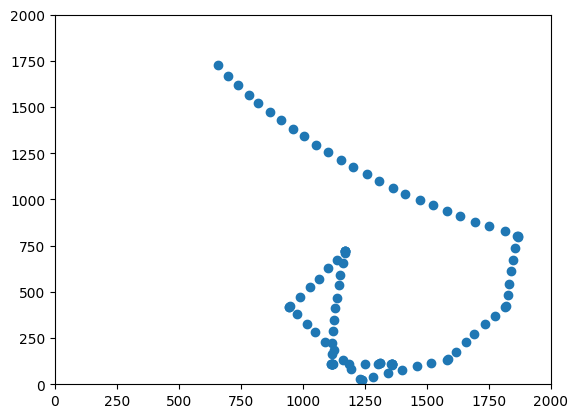

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2000)
# The scatter will be the first pose over time.
ax.scatter(poses_over_time[:, 0, 0], poses_over_time[:, 0, 1])
None

That is a match... Lets try the next pose...

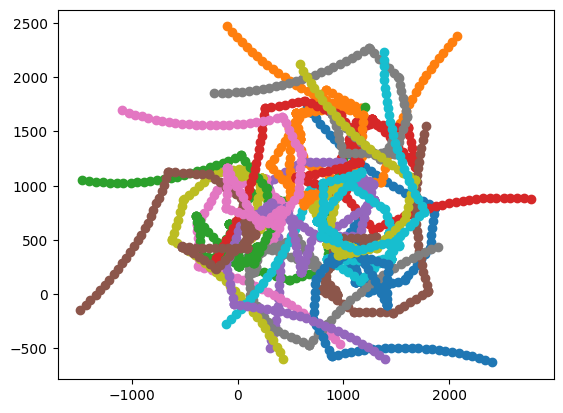

In [8]:
fig, ax = plt.subplots()

for pose_index in range(poses_over_time.shape[1]):
    ax.scatter(poses_over_time[:, pose_index, 0], poses_over_time[:, pose_index, 1])
